In [35]:
library(tidyverse)
library(forcats)

In [45]:
prediction_data <- read_csv("prediction.csv",skip=1)


Parsed with column specification:
cols(
  Branch_no = col_character(),
  LRT = col_double(),
  GST = col_double()
)


In [68]:
prediction_data

LRT,GST,Class
<dbl>,<dbl>,<fct>
20,1,A
23,2,A
23,3,A
22,3,A
22,6,A
22,7,A
22,8,A
23,9,A
21,12,A


In [51]:
prediction_data <- prediction_data %>% 
  mutate(Branch_no = as.factor(Branch_no))

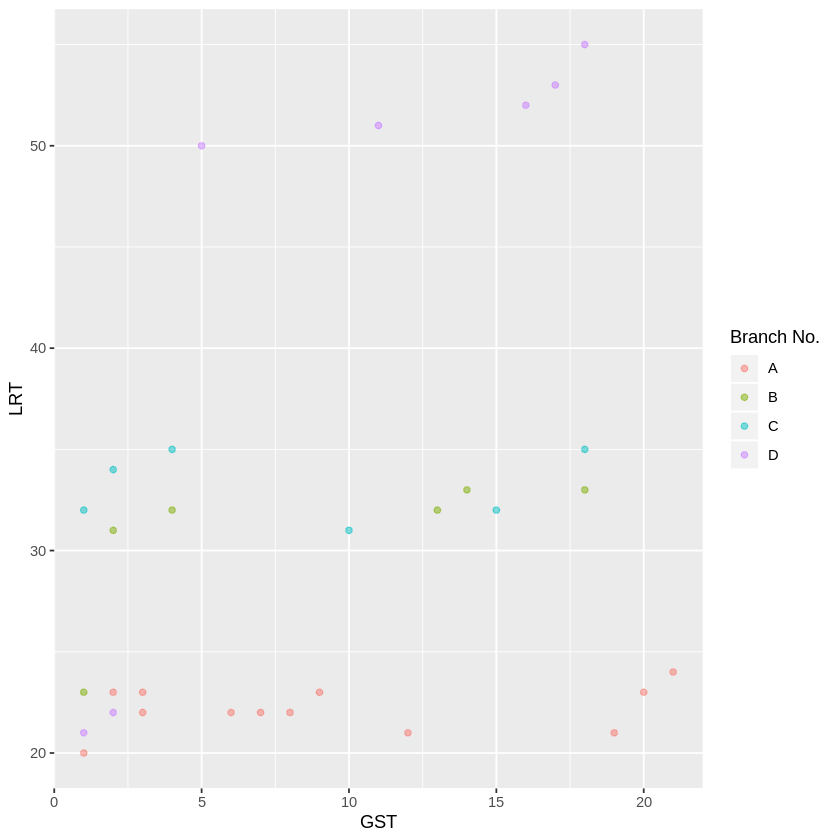

In [54]:

prediction_plot <- prediction_data %>%  
  ggplot(aes(x = GST, y = LRT, color = Branch_no)) + 
    geom_point(alpha = 0.5) +
    labs(x= "GST", y= "LRT", color = "Branch No.")
prediction_plot

In [55]:
library(caret)

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [56]:
prediction_train <- prediction_data %>%
  select("LRT", "GST")
head(prediction_train)

LRT,GST
<dbl>,<dbl>
20,1
23,1
32,1
21,1
23,2
34,2


In [59]:
prediction_labels <- prediction_data %>% 
  select(Branch_no) %>% 
  unlist()
head(prediction_labels)

Branch_no1 Branch_no2 Branch_no3 Branch_no4 Branch_no5 Branch_no6 
         A          B          C          D          A          C 
Levels: A B C D

In [60]:
k <- data.frame(k = 5)
model_knn <- train(x = data.frame(prediction_train), y = prediction_labels, method='knn', tuneGrid = k)

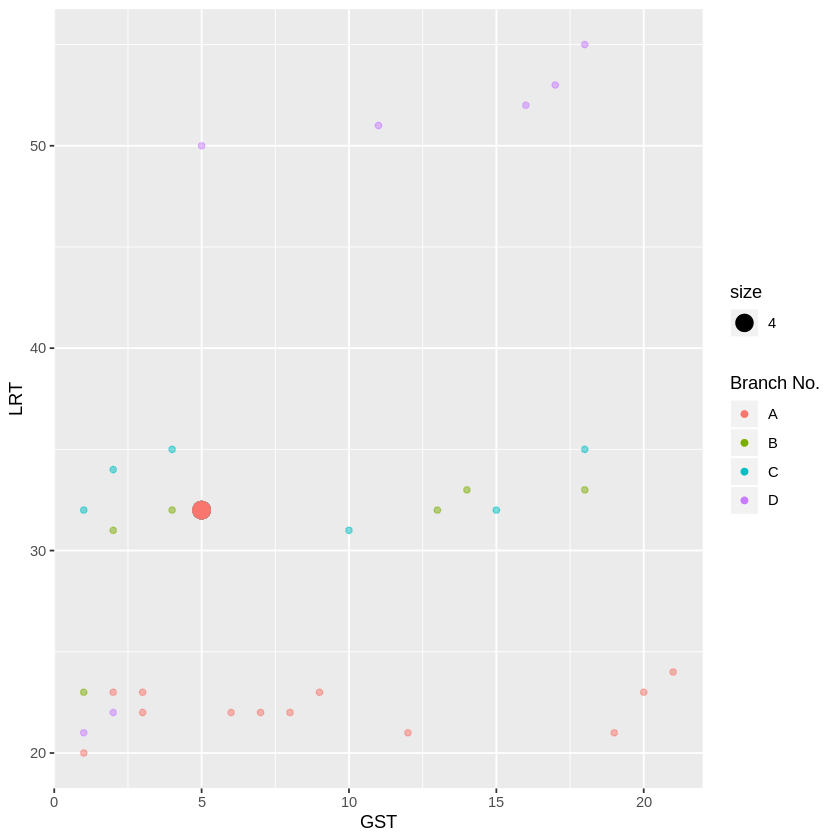

In [66]:
prediction_plot +
geom_point(x=5,y=32, aes(size=4))

In [67]:
new_obs <- data.frame(LRT = 32, GST = 5)
predict(object = model_knn, new_obs)

[1] C
Levels: A B C D